<a href="https://colab.research.google.com/github/JSY0717/GitHub_Practice2/blob/practice2/%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B0%9C%EB%A1%A0_%EB%B0%8F_%EC%9D%91%EC%9A%A9_2%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망을 위한 데이터 표현

In [ ]:
import tensorflow
import keras

In [ ]:
keras.__version__

'2.4.3'

### • 1) 손글씨 데이터 분류 (MNIST dataset)

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_images.ndim)
print(train_images.dtype)

(60000, 28, 28)
3
uint8


In [ ]:
len(train_labels) 

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

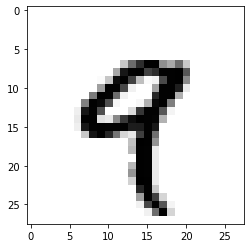

In [ ]:
# 3D 텐서에서 matplotlib을 사용
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

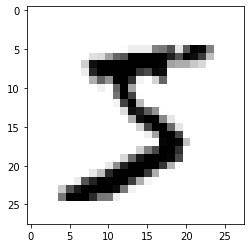

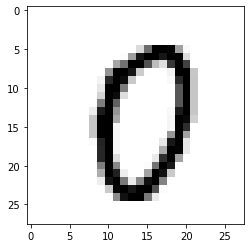

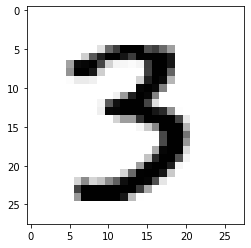

In [ ]:
numbers=[0,1000,10000]

for i in numbers:  # while i<3
  digit = train_images[i]
  i=i+1
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

*+) numpy로 tensor 조작*


In [ ]:
# slicing
my_sl = train_images[10:100]
#                   [10:100, 0:28, 0:28] 과 동일
my_sl.shape

(90, 28, 28)

*+) 배치 데이터 : tensor의 첫번째 축을 작게 나눈 단위*


In [ ]:
n=0
batch_n = train_images[128*n : 128*(n+1)]

### 1-1) 신경망 생성

신경망은 데이터 처리 필터 역할을 하는 '층' 으로 구성되어 있다. 데이터가 층을 통과하면서 점진적으로 정제된다.  
딥러닝 모델은 데이터 정제 필터가 연속된 여과기와 같다.  


In [ ]:
from keras import models,layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

.add() 를 통해 Dense 신경망 층 2개를 연속되게 했다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률이다.

In [ ]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


신경망 컴파일 단계에서 필요한 세 파라미터는 다음과 같다.  

1. 손실함수 : train data에서 신경망의 성능 측정  
2. 옵티마이저 : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘  
3. 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 전처리
# 1) 데이터를 network에 맞는 크기로 바꾸고, 모든 값을 0과 1 사이로 scale 조정
# 0~255 -> 0~1

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 2) 레이블을 범주형으로 인코딩
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# .fit() 메서드를 통해 train data에 모델을 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

#약 98.9%의 높은 정확도

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4187 - accuracy: 0.8802
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1053 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0697 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0480 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0371 - accuracy: 0.9892


In [ ]:
# test data에 network 적용
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.9802


In [ ]:
print('test_acc:', test_acc)
# 98.0%로, train data에서보다는 낮음. 차이가 발생하는 이유는 과대적합 때문.

test_acc: 0.9801999926567078


### •  2) 영화 리뷰 분류 (IMDB dataset)

In [ ]:
# imdb dataset 로드
from keras.datasets import imdb

# traindata, testdata 는 리뷰의 목록이다. 각 리뷰는 단어가 아니라 단어 인덱스의 리스트이다.
# label 은 리뷰가 긍정적인지, 부정적인지를 나타내는 0 or 1
(traindata,trainlabel),(testdata,testlabel) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
traindata[0]

In [ ]:
# 리뷰데이터 하나를 원래 영어단어로 바꾸는 예제 (단어 인덱스->단어들)

# 단어와 정수 인덱스를 매핑한 딕셔너리 호출
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집는다
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
# 영어단어로 변환
decoded_review= ' '.join([reverse_word_index.get(i - 3,'?') for i in traindata[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 2-1) 데이터 준비

신경망에 숫자 리스트를 입력할 수 없기 때문에, 리스트를 텐서로 변경해야 한다.

방법 1) 같은 길이가 되도록 리스트에 패딩을 추가하고, (saples, sequence_length) 크기의 정수 텐서로 변환  
방법 2) one-hot enconding

In [ ]:
# 방법 2) 정수 시퀀스를 이진행렬로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension)) # 영행렬 생성
  for i,sequences in enumerate (sequences):
    results[i, sequences] = 1. # 특정 인덱스의 위치를 1로 update
    return results

xtrain = vectorize_sequences(traindata)
xtest = vectorize_sequences(testdata)

In [ ]:
xtrain[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# 레이블을 벡터로 변환 (이미 1과 0으로 구성되어 있으므로 one-hot enconding 불필요)

ytrain = np.asarray(trainlabel).astype('float32')
ytest = np.asarray(testlabel).astype('float32')

### 2-2) 신경망 모델 만들기

In [ ]:
from keras import models,layers

mymodel = models.Sequential()
mymodel.add(layers.Dense(16, activation='relu',input_shape=(10000,)))  # 16개의 은닉층
mymodel.add(layers.Dense(16, activation='relu'))
mymodel.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
# 방법 1)

mymodel.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 모델 컴파일
# 방법 2) 옵티마이저의 매개변수 설정하기
#         loss와 metrics를 함수 객체로 지정하기

from keras import optimizers

mymodel.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

from keras import losses,metrics

mymodel.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])

### 2-3) 훈련 검증

In [ ]:
# 검증 데이터(처음 본 데이터) 준비

xvalid = xtrain[:10000]
partial_xtrain = xtrain[10000:]

yvalid = ytrain[:10000]
partial_ytrain = ytrain[10000:]

In [ ]:
partial_xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 모델을 512개의 sample 단위로 미니 batch를 만들어,20번의 에포크동안 훈련
# (xtrain과 ytrain tensor에 있는 모든 샘플에 대해 20번 반복)
# ,fit() : 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 객체를 반환

history = mymodel.fit(partial_xtrain,
                    partial_ytrain,
                    epochs=20,
                    batch_size=512,
                    validation_data=(xvalid,yvalid))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6932 - accuracy: 0.4891 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6931 - accuracy: 0.5061 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 2-4) matplotlib을 활용해 훈련과 검증 데이터에 대한 loss와 accuracy 시각화

In [ ]:
import matplotlib.pyplot as plt

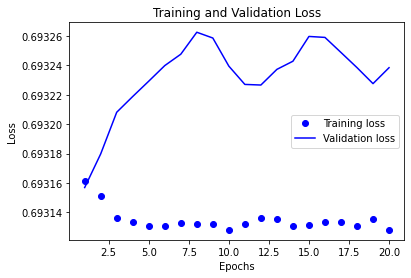

In [ ]:
#loss

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

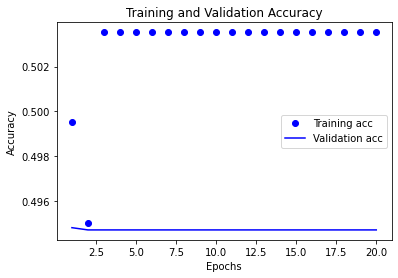

In [ ]:
# accuracy

plt.clf()  # 그래프 초기화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

training data에 과대적합되었음을 알 수 있다.  

과대적합을 완화하기 위해, 새로운 신경망을 4번의 에포크 동안만 훈련하고  
test data로 평가해본다.

### 2-2) 신경망 모델 만들기(2)


In [ ]:
mymodel = models.Sequential()
mymodel.add(layers.Dense(16, activation='relu',input_shape=(10000,)))  # 16개의 은닉층
mymodel.add(layers.Dense(16, activation='relu'))
mymodel.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
mymodel.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

mymodel.fit(xtrain, ytrain, epochs=4, batch_size=512)
results = mymodel.evaluate(xtest, ytest)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.6932 - accuracy: 0.4986
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000


In [ ]:
results  # 50%의 정확도?

[0.6931557655334473, 0.4999600052833557]

### 2-5) 훈련된 모델로 새로운 데이터에 대해 예측하기

In [ ]:
mymodel.predict(xtest)

array([[0.60192627],
       [0.49975878],
       [0.49975878],
       ...,
       [0.49975878],
       [0.49975878],
       [0.49975878]], dtype=float32)

0.99 or more, 0.01 or less : 샘플의 분류에 대해 확신을 가지고 있음

0.6, 0,4 ... : 확신 부족